In [8]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js');

<IPython.core.display.Javascript object>

<h1 id="tocheading">Sommaire</h1>
<div id="toc"></div>

# Import des données

In [9]:
import calendar
import pandas as pd
import numpy as np
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score
from sklearn import manifold
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from time import time

%config InlineBackend.figure_format = 'retina'
%matplotlib inline 

In [10]:
!ls

Test.csv
Train.csv
challenge-SG.ipynb
challenge-SG.slides.html
challenge_fichier_de_sortie_dentrainement_predire_la_tendance_de_la_production_de_petrole_brut.csv
soumission.csv


In [11]:
pd.set_option("display.max_columns", 9999) # permet de voir toutes les colonnes
pd.set_option("display.max_rows", 200) # permet de voir toutes les colonnes

train1 = pd.read_csv('./Train.csv',encoding='utf-8',sep=';',low_memory=False)
train2 = pd.read_csv('./challenge_fichier_de_sortie_dentrainement_predire_la_tendance_de_la_production_de_petrole_brut.csv',encoding='utf-8',sep=';',low_memory=False)
test = pd.read_csv('./Test.csv',encoding='utf-8',sep=';',low_memory=False)
print train1.shape
print train2.shape
train = train2.merge(train1, on=['ID'])

(10159, 123)
(10159, 2)


In [12]:
print 'train shape : {}'.format(train.shape)
print 'test  shape : {}'.format(test.shape)
train.head(4)

train shape : (10159, 124)
test  shape : (2000, 123)


,ID,Target,month,country,1_diffClosing stocks(kmt),1_diffExports(kmt),1_diffImports(kmt),1_diffRefinery intake(kmt),1_diffWTI,1_diffSumClosing stocks(kmt),1_diffSumExports(kmt),1_diffSumImports(kmt),1_diffSumProduction(kmt),1_diffSumRefinery intake(kmt),2_diffClosing stocks(kmt),2_diffExports(kmt),2_diffImports(kmt),2_diffRefinery intake(kmt),2_diffWTI,2_diffSumClosing stocks(kmt),2_diffSumExports(kmt),2_diffSumImports(kmt),2_diffSumProduction(kmt),2_diffSumRefinery intake(kmt),3_diffClosing stocks(kmt),3_diffExports(kmt),3_diffImports(kmt),3_diffRefinery intake(kmt),3_diffWTI,3_diffSumClosing stocks(kmt),3_diffSumExports(kmt),3_diffSumImports(kmt),3_diffSumProduction(kmt),3_diffSumRefinery intake(kmt),4_diffClosing stocks(kmt),4_diffExports(kmt),4_diffImports(kmt),4_diffRefinery intake(kmt),4_diffWTI,4_diffSumClosing stocks(kmt),4_diffSumExports(kmt),4_diffSumImports(kmt),4_diffSumProduction(kmt),4_diffSumRefinery intake(kmt),5_diffClosing stocks(kmt),5_diffExports(kmt),5_diffImports(kmt),5_diffRefinery intake(kmt),5_diffWTI,5_diffSumClosing stocks(kmt),5_diffSumExports(kmt),5_diffSumImports(kmt),5_diffSumProduction(kmt),5_diffSumRefinery intake(kmt),6_diffClosing stocks(kmt),6_diffExports(kmt),6_diffImports(kmt),6_diffRefinery intake(kmt),6_diffWTI,6_diffSumClosing stocks(kmt),6_diffSumExports(kmt),6_diffSumImports(kmt),6_diffSumProduction(kmt),6_diffSumRefinery intake(kmt),7_diffClosing stocks(kmt),7_diffExports(kmt),7_diffImports(kmt),7_diffRefinery intake(kmt),7_diffWTI,7_diffSumClosing stocks(kmt),7_diffSumExports(kmt),7_diffSumImports(kmt),7_diffSumProduction(kmt),7_diffSumRefinery intake(kmt),8_diffClosing stocks(kmt),8_diffExports(kmt),8_diffImports(kmt),8_diffRefinery intake(kmt),8_diffWTI,8_diffSumClosing stocks(kmt),8_diffSumExports(kmt),8_diffSumImports(kmt),8_diffSumProduction(kmt),8_diffSumRefinery intake(kmt),9_diffClosing stocks(kmt),9_diffExports(kmt),9_diffImports(kmt),9_diffRefinery intake(kmt),9_diffWTI,9_diffSumClosing stocks(kmt),9_diffSumExports(kmt),9_diffSumImports(kmt),9_diffSumProduction(kmt),9_diffSumRefinery intake(kmt),10_diffClosing stocks(kmt),10_diffExports(kmt),10_diffImports(kmt),10_diffRefinery intake(kmt),10_diffWTI,10_diffSumClosing stocks(kmt),10_diffSumExports(kmt),10_diffSumImports(kmt),10_diffSumProduction(kmt),10_diffSumRefinery intake(kmt),11_diffClosing stocks(kmt),11_diffExports(kmt),11_diffImports(kmt),11_diffRefinery intake(kmt),11_diffWTI,11_diffSumClosing stocks(kmt),11_diffSumExports(kmt),11_diffSumImports(kmt),11_diffSumProduction(kmt),11_diffSumRefinery intake(kmt),12_diffClosing stocks(kmt),12_diffExports(kmt),12_diffImports(kmt),12_diffRefinery intake(kmt),12_diffWTI,12_diffSumClosing stocks(kmt),12_diffSumExports(kmt),12_diffSumImports(kmt),12_diffSumProduction(kmt),12_diffSumRefinery intake(kmt)
0,ID00001,1,5,52,0.0000,237.0000,0.0000,33.0000,-5.62,10426.2462,12135.1024,20527.7805,32234.6302,25998.8106,0.0000,-159.000,0.0000,-17.0000,-5.05,-3509.9957,1123.9965,-6034.0395,-2105.2971,-7860.3692,0.0000,66.0000,0.0000,12.0000,3.47,-1389.7911,8409.3483,327.2804,7339.6815,5869.7289,0.0000,-33.0000,0.0000,-15.0000,0.59,2029.2697,-16196.6495,-1478.0084,-15979.7214,-10585.7202,0.0000,-101.0000,0.0000,9.0000,0.41,3248.9199,9926.7086,4603.5973,11148.1071,11514.6714,0.0000,232.0000,0.0000,3.0000,1.20,-2667.6106,2274.4733,-4053.9670,-219.4584,2538.4810,0.0000,-274.0000,0.0000,-15.0000,-2.57,355.8237,-8931.1323,3955.8983,-9144.6975,-9465.9063,0.0000,0.0000,0.000,14.0000,0.05,4889.5331,6657.9195,1690.7062,11520.7138,9405.5441,0.0000,61.0000,0.0000,-11.0000,1.09,-3976.8715,-6369.5420,-6065.5223,-10153.0055,-5197.6130,0.0000,317.0000,0.0,20.0000,2.18,1148.7574,9992.2864,11136.5389,12455.0182,9752.4620,0.0000,0.000,0.0,-39.0000,0.65,11955.6239,2183.3548,2914.9567,-258.3885,4412.7639,0.0000,0.0000,0.0000,14.0000,2.92,673.8569,-13007.1520,-5932.5482,-17130.8333,-13151.4560
1,ID00002,0,12,69,28.0000,-34.0000,60.0000,7.0000,-5.95,195.2005,7500.1033,6335.0098,12732.1449,9538.8196,-70.0000,20.

In [29]:
#archik = pd.DataFrame()
#train.join(archik).head()

aaa = train.head()
aaa.join(pd.DataFrame())

,ID,Target,month,country,1_diffClosing stocks(kmt),1_diffExports(kmt),1_diffImports(kmt),1_diffRefinery intake(kmt),1_diffWTI,1_diffSumClosing stocks(kmt),1_diffSumExports(kmt),1_diffSumImports(kmt),1_diffSumProduction(kmt),1_diffSumRefinery intake(kmt),2_diffClosing stocks(kmt),2_diffExports(kmt),2_diffImports(kmt),2_diffRefinery intake(kmt),2_diffWTI,2_diffSumClosing stocks(kmt),2_diffSumExports(kmt),2_diffSumImports(kmt),2_diffSumProduction(kmt),2_diffSumRefinery intake(kmt),3_diffClosing stocks(kmt),3_diffExports(kmt),3_diffImports(kmt),3_diffRefinery intake(kmt),3_diffWTI,3_diffSumClosing stocks(kmt),3_diffSumExports(kmt),3_diffSumImports(kmt),3_diffSumProduction(kmt),3_diffSumRefinery intake(kmt),4_diffClosing stocks(kmt),4_diffExports(kmt),4_diffImports(kmt),4_diffRefinery intake(kmt),4_diffWTI,4_diffSumClosing stocks(kmt),4_diffSumExports(kmt),4_diffSumImports(kmt),4_diffSumProduction(kmt),4_diffSumRefinery intake(kmt),5_diffClosing stocks(kmt),5_diffExports(kmt),5_diffImports(kmt),5_diffRefinery intake(kmt),5_diffWTI,5_diffSumClosing stocks(kmt),5_diffSumExports(kmt),5_diffSumImports(kmt),5_diffSumProduction(kmt),5_diffSumRefinery intake(kmt),6_diffClosing stocks(kmt),6_diffExports(kmt),6_diffImports(kmt),6_diffRefinery intake(kmt),6_diffWTI,6_diffSumClosing stocks(kmt),6_diffSumExports(kmt),6_diffSumImports(kmt),6_diffSumProduction(kmt),6_diffSumRefinery intake(kmt),7_diffClosing stocks(kmt),7_diffExports(kmt),7_diffImports(kmt),7_diffRefinery intake(kmt),7_diffWTI,7_diffSumClosing stocks(kmt),7_diffSumExports(kmt),7_diffSumImports(kmt),7_diffSumProduction(kmt),7_diffSumRefinery intake(kmt),8_diffClosing stocks(kmt),8_diffExports(kmt),8_diffImports(kmt),8_diffRefinery intake(kmt),8_diffWTI,8_diffSumClosing stocks(kmt),8_diffSumExports(kmt),8_diffSumImports(kmt),8_diffSumProduction(kmt),8_diffSumRefinery intake(kmt),9_diffClosing stocks(kmt),9_diffExports(kmt),9_diffImports(kmt),9_diffRefinery intake(kmt),9_diffWTI,9_diffSumClosing stocks(kmt),9_diffSumExports(kmt),9_diffSumImports(kmt),9_diffSumProduction(kmt),9_diffSumRefinery intake(kmt),10_diffClosing stocks(kmt),10_diffExports(kmt),10_diffImports(kmt),10_diffRefinery intake(kmt),10_diffWTI,10_diffSumClosing stocks(kmt),10_diffSumExports(kmt),10_diffSumImports(kmt),10_diffSumProduction(kmt),10_diffSumRefinery intake(kmt),11_diffClosing stocks(kmt),11_diffExports(kmt),11_diffImports(kmt),11_diffRefinery intake(kmt),11_diffWTI,11_diffSumClosing stocks(kmt),11_diffSumExports(kmt),11_diffSumImports(kmt),11_diffSumProduction(kmt),11_diffSumRefinery intake(kmt),12_diffClosing stocks(kmt),12_diffExports(kmt),12_diffImports(kmt),12_diffRefinery intake(kmt),12_diffWTI,12_diffSumClosing stocks(kmt),12_diffSumExports(kmt),12_diffSumImports(kmt),12_diffSumProduction(kmt),12_diffSumRefinery intake(kmt)
0,ID00001,1,5,52,0.0000,237.0000,0.0000,33.0000,-5.62,10426.2462,12135.1024,20527.7805,32234.6302,25998.8106,0.0000,-159.0000,0.0000,-17.0000,-5.05,-3509.9957,1123.9965,-6034.0395,-2105.2971,-7860.3692,0.0000,66.0000,0.0000,12.0000,3.47,-1389.7911,8409.3483,327.2804,7339.6815,5869.7289,0.0000,-33.0000,0.0000,-15.0000,0.59,2029.2697,-16196.6495,-1478.0084,-15979.7214,-10585.7202,0.0000,-101.0000,0.0000,9.0000,0.41,3248.9199,9926.7086,4603.5973,11148.1071,11514.6714,0.0000,232.0000,0.0000,3.0000,1.20,-2667.6106,2274.4733,-4053.9670,-219.4584,2538.4810,0.0000,-274.0000,0.0000,-15.0000,-2.57,355.8237,-8931.1323,3955.8983,-9144.6975,-9465.9063,0.0000,0.0000,0.000,14.0000,0.05,4889.5331,6657.9195,1690.7062,11520.7138,9405.5441,0.0000,61.0000,0.0000,-11.0000,1.09,-3976.8715,-6369.5420,-6065.5223,-10153.0055,-5197.6130,0.0000,317.0000,0.0,20.0000,2.18,1148.7574,9992.2864,11136.5389,12455.0182,9752.4620,0.0000,0.0000,0.0,-39.0000,0.65,11955.6239,2183.3548,2914.9567,-258.3885,4412.7639,0.0000,0.0000,0.0000,14.0000,2.92,673.8569,-13007.1520,-5932.5482,-17130.8333,-13151.4560
1,ID00002,0,12,69,28.0000,-34.0000,60.0000,7.0000,-5.95,195.2005,7500.1033,6335.0098,12732.1449,9538.8196,-70.0000,2

# Analyse descriptive

% de 0 : 0.654001378088
% de 1 : 0.345998621912


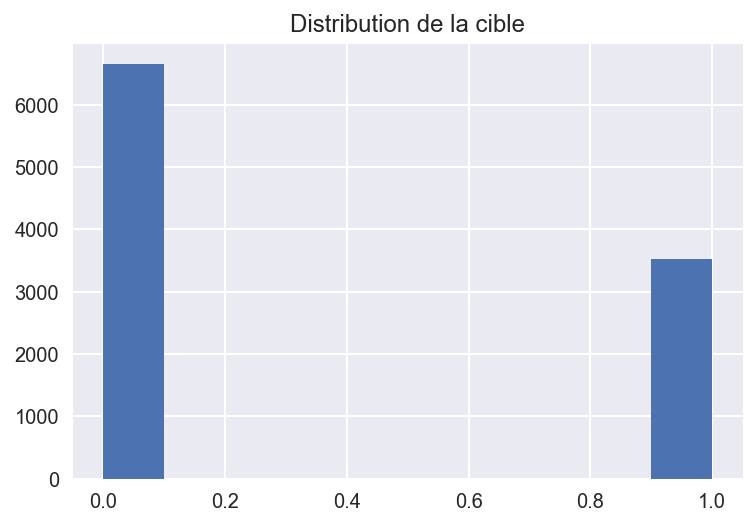

In [197]:
print '% de 0 :',(train['Target']==0).mean()
print '% de 1 :',(train['Target']).mean()
plt.title('Distribution de la cible');train.Target.hist();

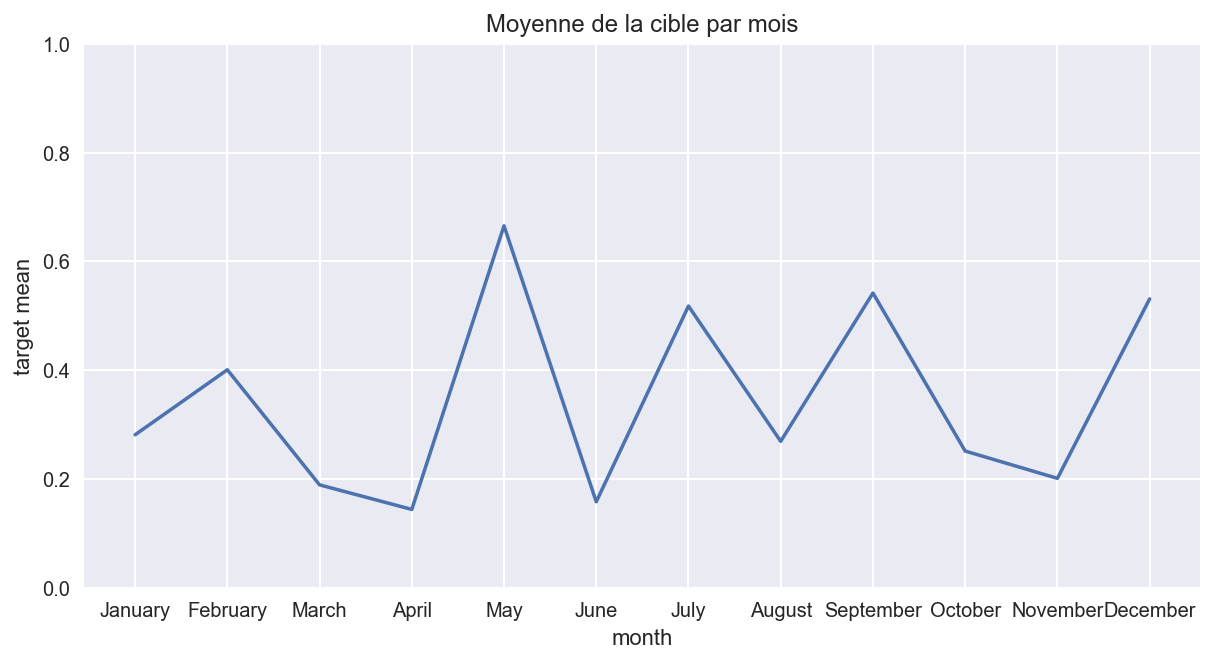

In [198]:
month_list = []
mean_by_month = []
for i in range(1,13):
    month_list.append(calendar.month_name[i])
    mean_by_month.append(train[train.month==i].Target.mean())
plt.figure(figsize=(10,5))
plt.ylabel('target mean');plt.xlabel('month');plt.ylim(0,1)
plt.xticks(range(1,13), month_list)
plt.title('Moyenne de la cible par mois');plt.plot(range(1,13), mean_by_month);

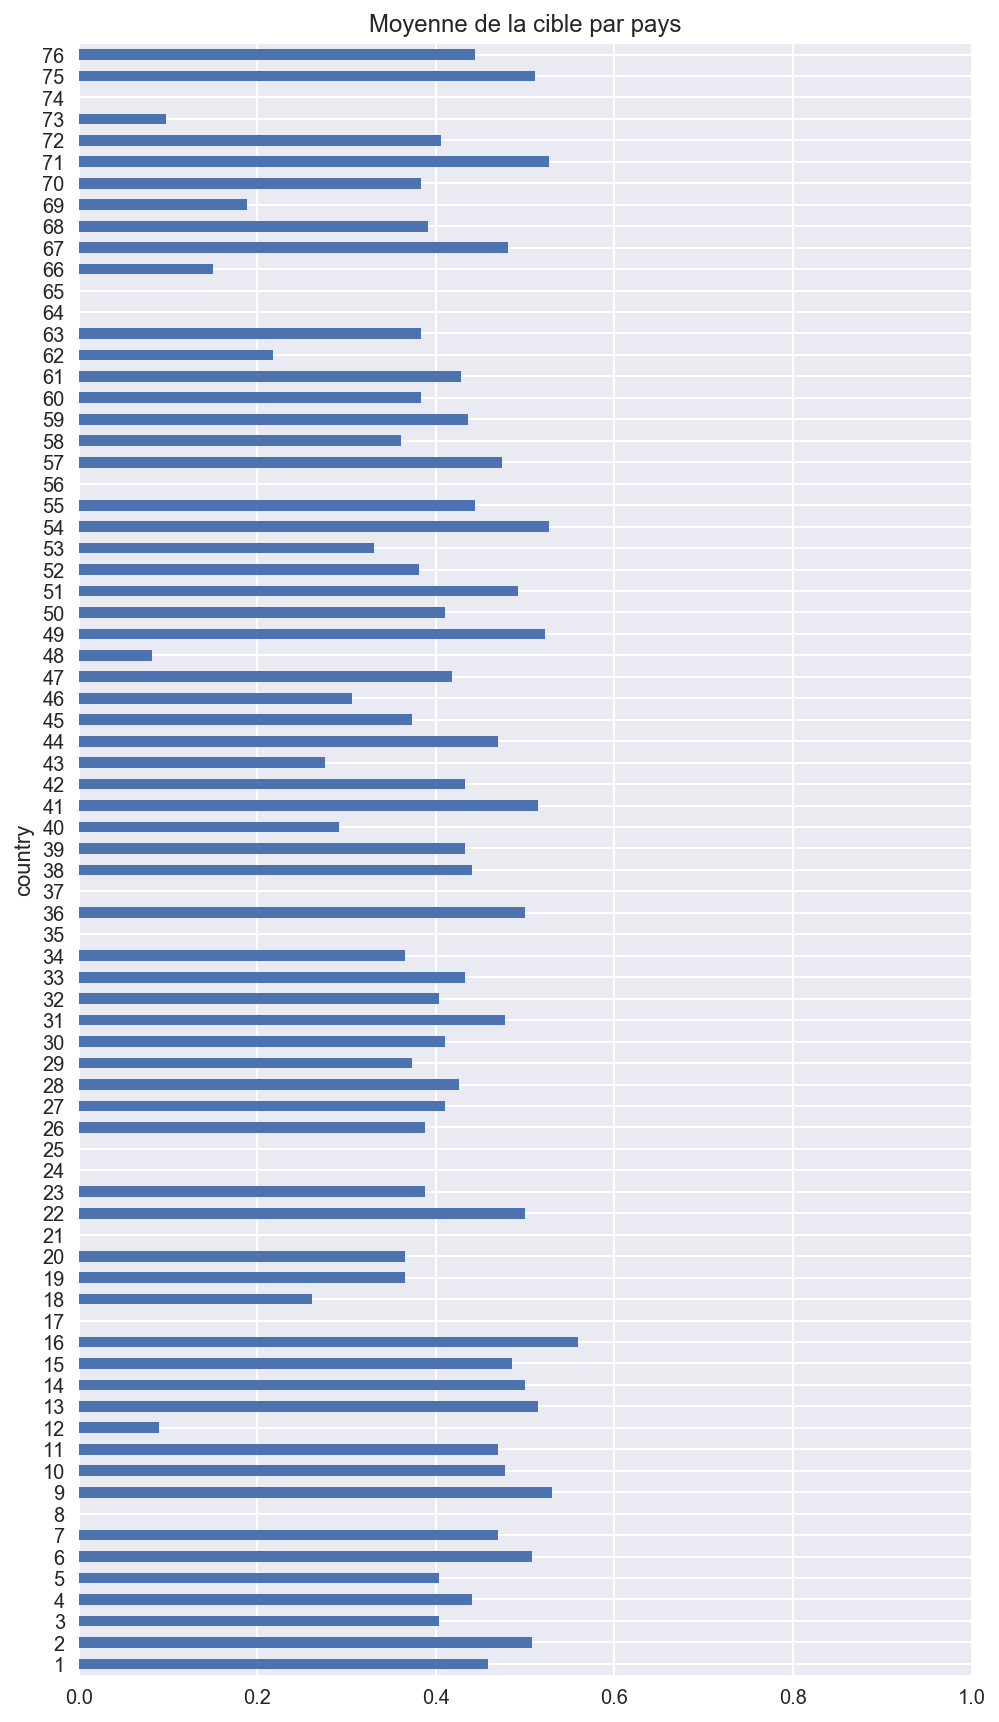

In [199]:
plt.figure(figsize=(8,15))
plt.xlim(0,1)
plt.title('Moyenne de la cible par pays');train.groupby('country').mean().Target.plot(kind="barh");

In [200]:
train.loc[(train['month']==1) & (train['country']==1),]

,ID,Target,month,country,1_diffClosing stocks(kmt),1_diffExports(kmt),1_diffImports(kmt),1_diffRefinery intake(kmt),1_diffWTI,1_diffSumClosing stocks(kmt),1_diffSumExports(kmt),1_diffSumImports(kmt),1_diffSumProduction(kmt),1_diffSumRefinery intake(kmt),2_diffClosing stocks(kmt),2_diffExports(kmt),2_diffImports(kmt),2_diffRefinery intake(kmt),2_diffWTI,2_diffSumClosing stocks(kmt),2_diffSumExports(kmt),2_diffSumImports(kmt),2_diffSumProduction(kmt),2_diffSumRefinery intake(kmt),3_diffClosing stocks(kmt),3_diffExports(kmt),3_diffImports(kmt),3_diffRefinery intake(kmt),3_diffWTI,3_diffSumClosing stocks(kmt),3_diffSumExports(kmt),3_diffSumImports(kmt),3_diffSumProduction(kmt),3_diffSumRefinery intake(kmt),4_diffClosing stocks(kmt),4_diffExports(kmt),4_diffImports(kmt),4_diffRefinery intake(kmt),4_diffWTI,4_diffSumClosing stocks(kmt),4_diffSumExports(kmt),4_diffSumImports(kmt),4_diffSumProduction(kmt),4_diffSumRefinery intake(kmt),5_diffClosing stocks(kmt),5_diffExports(kmt),5_diffImports(kmt),5_diffRefinery intake(kmt),5_diffWTI,5_diffSumClosing stocks(kmt),5_diffSumExports(kmt),5_diffSumImports(kmt),5_diffSumProduction(kmt),5_diffSumRefinery intake(kmt),6_diffClosing stocks(kmt),6_diffExports(kmt),6_diffImports(kmt),6_diffRefinery intake(kmt),6_diffWTI,6_diffSumClosing stocks(kmt),6_diffSumExports(kmt),6_diffSumImports(kmt),6_diffSumProduction(kmt),6_diffSumRefinery intake(kmt),7_diffClosing stocks(kmt),7_diffExports(kmt),7_diffImports(kmt),7_diffRefinery intake(kmt),7_diffWTI,7_diffSumClosing stocks(kmt),7_diffSumExports(kmt),7_diffSumImports(kmt),7_diffSumProduction(kmt),7_diffSumRefinery intake(kmt),8_diffClosing stocks(kmt),8_diffExports(kmt),8_diffImports(kmt),8_diffRefinery intake(kmt),8_diffWTI,8_diffSumClosing stocks(kmt),8_diffSumExports(kmt),8_diffSumImports(kmt),8_diffSumProduction(kmt),8_diffSumRefinery intake(kmt),9_diffClosing stocks(kmt),9_diffExports(kmt),9_diffImports(kmt),9_diffRefinery intake(kmt),9_diffWTI,9_diffSumClosing stocks(kmt),9_diffSumExports(kmt),9_diffSumImports(kmt),9_diffSumProduction(kmt),9_diffSumRefinery intake(kmt),10_diffClosing stocks(kmt),10_diffExports(kmt),10_diffImports(kmt),10_diffRefinery intake(kmt),10_diffWTI,10_diffSumClosing stocks(kmt),10_diffSumExports(kmt),10_diffSumImports(kmt),10_diffSumProduction(kmt),10_diffSumRefinery intake(kmt),11_diffClosing stocks(kmt),11_diffExports(kmt),11_diffImports(kmt),11_diffRefinery intake(kmt),11_diffWTI,11_diffSumClosing stocks(kmt),11_diffSumExports(kmt),11_diffSumImports(kmt),11_diffSumProduction(kmt),11_diffSumRefinery intake(kmt),12_diffClosing stocks(kmt),12_diffExports(kmt),12_diffImports(kmt),12_diffRefinery intake(kmt),12_diffWTI,12_diffSumClosing stocks(kmt),12_diffSumExports(kmt),12_diffSumImports(kmt),12_diffSumProduction(kmt),12_diffSumRefinery intake(kmt)
1086,ID01087,0,1,1,-19.4341,-119.750,2.500,-119.4520,-5.56,-1881.4445,-5372.2108,-4605.2765,-11275.8093,-2701.6853,-14.2682,507.250,-2.500,51.5068,7.35,-2222.2596,8847.5740,10787.4755,14783.5721,13977.9311,-2.8290,-96.875,0.000,-67.9452,-4.28,3598.3388,-2602.3858,-753.5600,-1559.6188,-1330.7546,0.3690,-753.875,1.125,27.6712,10.11,-1205.9426,-8678.9461,-15628.2401,-17852.5344,-21993.9288,-16.2362,443.875,0.000,-448.0822,-0.24,5448.8799,3956.4778,16043.4753,18785.0064,19974.6764,-9.5941,334.625,0.000,-208.3561,12.16,830.1912,269.7015,-7511.8921,-11652.5443,-13372.9639,35.4244,-807.375,-5.000,1019.4520,13.65,-3284.4908,3898.9026,2763.9683,9378.1946,13542.7841,-0.6150,316.125,-1.125,-172.8767,12.61,2786.9359,-4286.4373,-2623.4885,-7817.3203,-7381.6862,-23.3703,214.750,8.875,45.4795,-15.79,473.7204,1000.7057,6570.3928,11479.8349,9437.7656,-23.4932,248.000,0.000,21.2329,-8.62,-2929.8903,1072.8473,504.0197,-4827.2299,3962.6288,53.1365,-316.500,-8.875,-99.5891,-14.85,4636.3242,-12084.7079,-16072.0095,-10930.3444,-23788.6940,-22.2632,165.375,-10.500,95.3425,-32.60,5108.1212,11540.4425,14204.4717,12949.1682,15777.6162
1405,ID01406,0,1,1,3.9360,-364.375,14.500,43.2876,0.15,4618.3856,-8000.

In [201]:
diffClosing = [col for col in train.columns if col.endswith('_diffClosing stocks(kmt)')]

def diffClossing_viz(range_, target):
    k=0
    for i in range(range_):
        if (train.loc[i,'Target']==target):
            k+=1
            plt.plot(train.loc[i,diffClosing].tolist())
            plt.ylim(-900,900)
    print 'Number of displayed curve: {}'.format(k)

Number of displayed curve: 44


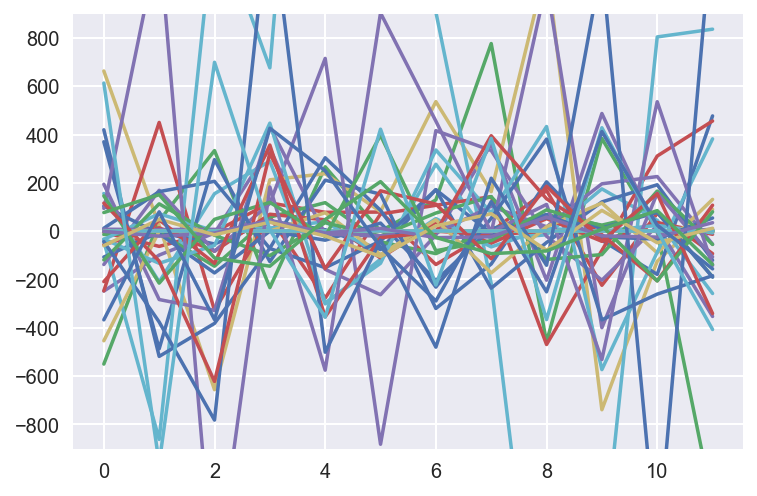

In [202]:
diffClossing_viz(120, 1)

Number of displayed curve: 44


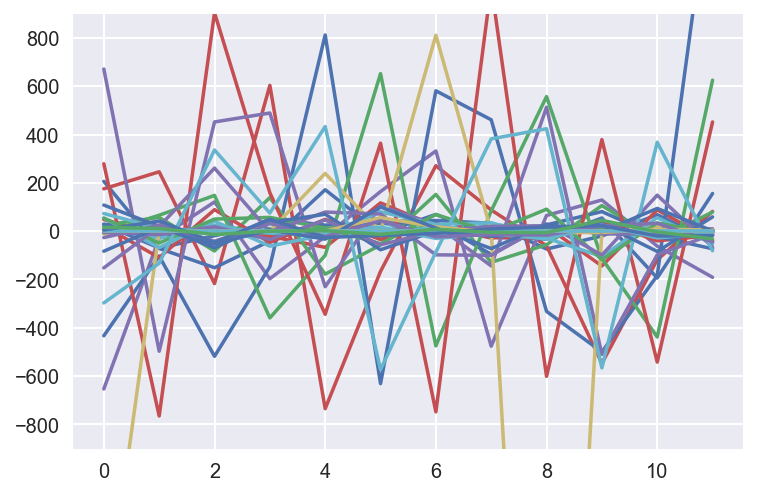

In [203]:
diffClossing_viz(68, 0)

On voit visuellement que la variance des 12 variables sélectionnées est plus grande lorsque la target vaut 1
- idée : créer une feature 'var(diffClosing)'

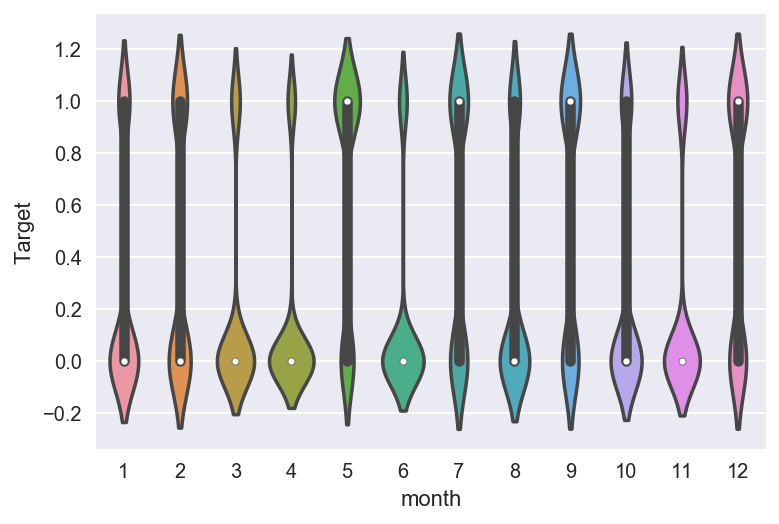

In [204]:
sns.violinplot(y="Target", x="month", data=train);

# Preparation des donnees

In [205]:
# On rassemble pour le feature engineering
df = pd.concat([train,test])
df.reset_index(inplace=True)
print (df.shape)

(12159, 125)


### Nettoyage des données

In [206]:
# On garde les données dites aberrantes
# Sélection des colonnes qui ont des valeurs manquantes (NaN)
col_to_fill = []
for col in df.columns:
    if df[col].isnull().sum() != 0 and col != 'Target':
        col_to_fill.append(col)

# On remplace les NaN par les prédictions d'un modèle de régression (lightgbm)
for col in col_to_fill:
    tofill_train = df[df[col].notnull()]
    tofill_test = df[df[col].isnull()]
    tofill_target_train = tofill_train[col]
    tofill_train = tofill_train.drop(col_to_fill, axis=1)
    tofill_train = tofill_train.drop(['Target','ID','index'], axis=1)
    tofill_test = tofill_test.drop(col_to_fill, axis=1)
    tofill_test = tofill_test.drop(['Target','ID','index'], axis=1)

    gbm = lgb.LGBMRegressor()
    gbm.fit(tofill_train, tofill_target_train)
    df.loc[df[col].isnull(),col] = gbm.predict(tofill_test)

### t-SNE / PCA

Variance expliquée : 33%


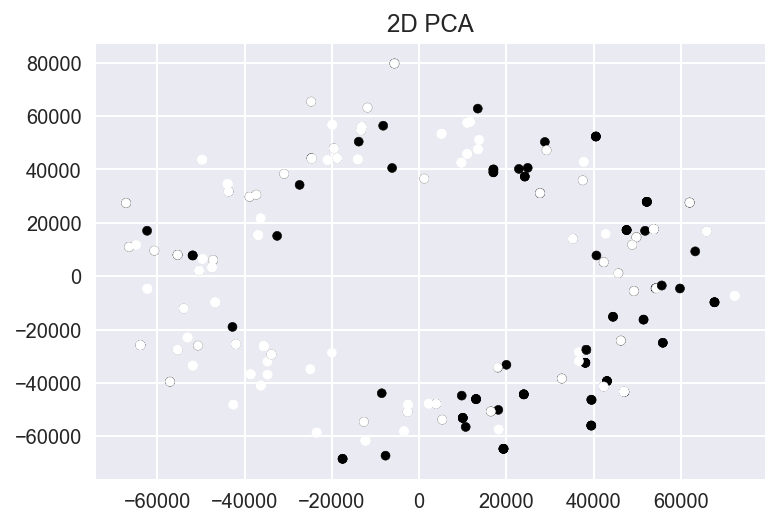

In [98]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop(['Target','ID','index'], axis=1)[:500])
print 'Variance expliquée : {0:.0f}%'.format(pca.explained_variance_ratio_.sum()*100)
plt.title('2D PCA');plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df.Target[:500], s=20);

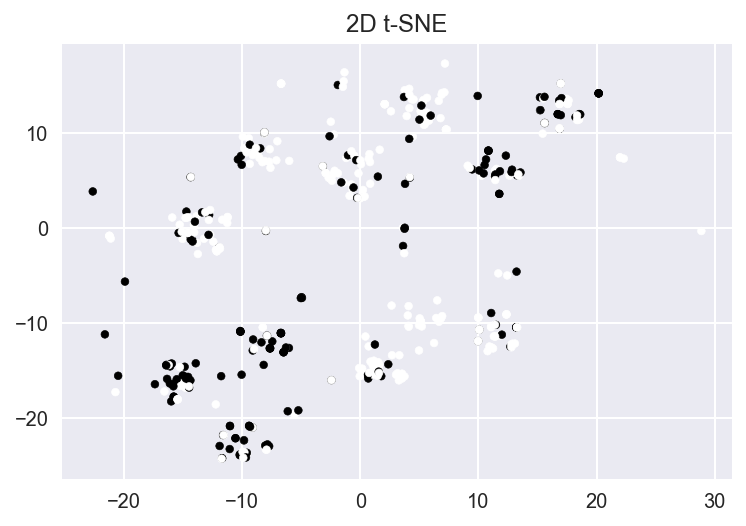

In [99]:
tsne = manifold.TSNE(n_components=2, init='random', perplexity=50, n_iter=3000)
X_tsne = tsne.fit_transform(df.drop(['Target','ID','index'], axis=1)[:500])
plt.title('2D t-SNE');plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df.Target[:500], s=15);

### Creation de feature

In [207]:
list_explained_variance = []
for i in range(30):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(df.drop(['Target','ID','index'], axis=1))
    list_explained_variance.append(pca.explained_variance_ratio_.sum()*100)

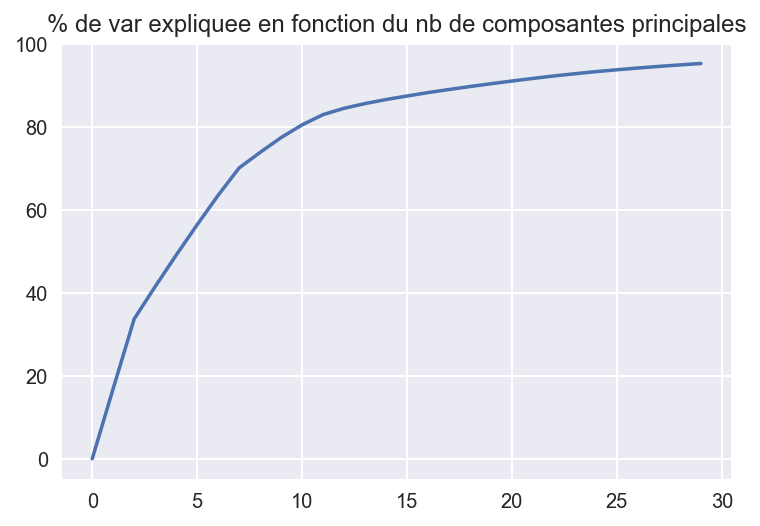

In [208]:
plt.title('% de var expliquee en fonction du nb de composantes principales');plt.plot(list_explained_variance);

In [209]:
# Ajout des features PCA
n_components=20
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(df.drop(['Target','ID','index'], axis=1))
print 'Variance expliquée : {0:.0f}%'.format(pca.explained_variance_ratio_.sum()*100)
for i in range(n_components):
    df['pca_{}'.format(i)] = X_pca[:, i]

Variance expliquée : 91%


In [210]:
# Variance des diffClosing
df['var_diffClosing'] = df[diffClosing].var(1)

# Somme des diffClosing
df['sum_diffClosing'] = df[diffClosing].sum(1)

# Somme de toutes les colonnes
df['sum_all_col'] = df.sum(1)

In [211]:
def create_var_mean_target_aggregate(var, df):
    mean_var = df.loc[:train.shape[0]-1,:].groupby(var).mean().Target.reset_index()
    mean_var.columns=[var,'mean_'+var+'_target']
    return df.merge(mean_var, on=var, how='left')
    
var_list_to_aggregate = ['month','country']

for var in var_list_to_aggregate:
    df = create_var_mean_target_aggregate(var, df)

col_mean = [col for col in df.columns if col.startswith('mean_')]
df['mean_all_mean_target'] = df[col_mean].mean(1)

In [212]:
# Créer variable moyenne de cible (moyenne de l'agrégation par pays et mois)
mean_CM = train.groupby(['country','month']).mean().Target.reset_index()
mean_CM.columns=['country','month','mean_CM_target']
df = df.merge(mean_CM, on=['country','month'], how='left')

### Sélection de feature

In [106]:
import scipy as sp
col_list = df.columns
len_ = len(df.columns)
dict_corr = {}
for i in range(len_):
    for j in range(i+1, len_):
        col1 = col_list[i]
        col2 = col_list[j]
        if col1 != 'Target' and col2 != 'Target':
            spearman_correlation = sp.stats.spearmanr(df[col1], df[col2])[0]
            dict_corr[col1+'//'+col2] = np.abs(spearman_correlation)

KeyboardInterrupt: 

In [ ]:
print 'max corr :', max(dict_corr.values())
sorted(dict_corr, reverse=True)[:10]
# to_drop = ??

### On separe a nouveau train et test

In [213]:
df_train = df.loc[:train.shape[0]-1,:]
df_test = df.loc[train.shape[0]:,:]

target_train = df_train.Target
df_train = df_train.drop(['Target','ID','index'], axis=1)
df_test = df_test.drop(['Target','ID','index'], axis=1)

# Creation d'un modele

### Variables importantes

auc score : 0.853375341382


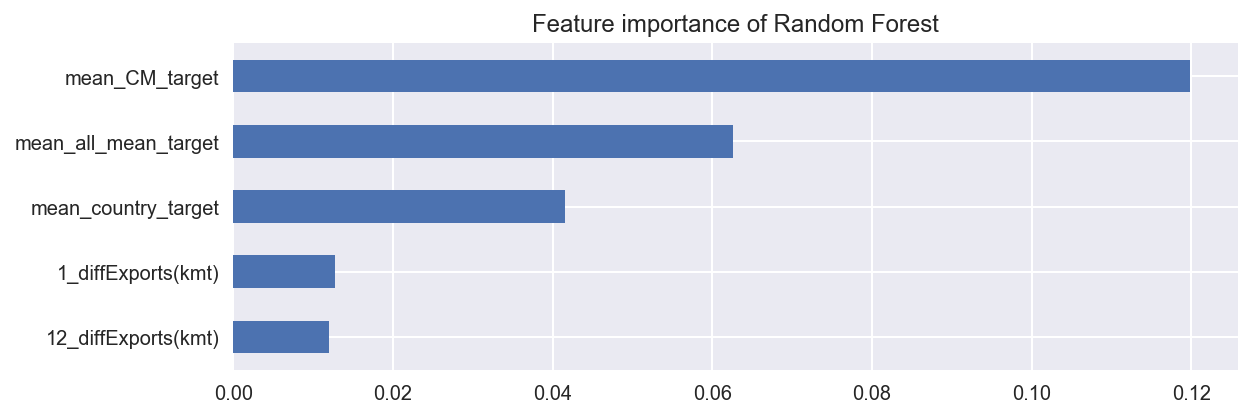

In [214]:
X_train, X_test, y_train, y_test = train_test_split(
    df_train, target_train, test_size=0.2, random_state=42)
rf = RandomForestClassifier(
    n_estimators=200, random_state=42, n_jobs=8)
rf.fit(X_train, y_train)
print 'auc score : {}'.format(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

plt.figure(figsize=(9, 3))
fi_result = pd.DataFrame(rf.feature_importances_, index=X_train.columns).T
fi_grouped = fi_result.iloc[0].sort_values(ascending=False)[:5]
ax = fi_grouped.plot(kind="barh")
plt.title('Feature importance of Random Forest');ax.invert_yaxis();plt.show()

###  Recherche des poids (classes déséquilibrées)
https://www.slideshare.net/ArnauddeMyttenaere/machine-learning-using-biased-data

% de 0 : 0.7065
% de 1 : 0.2935


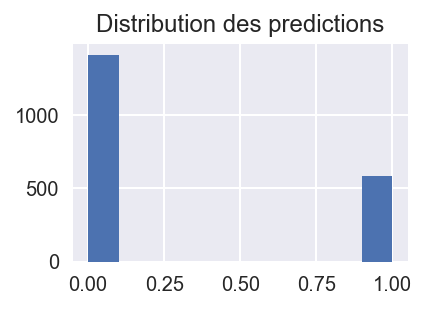

1.07492128236 0.858384921764
% de 0 : 0.703
% de 1 : 0.297


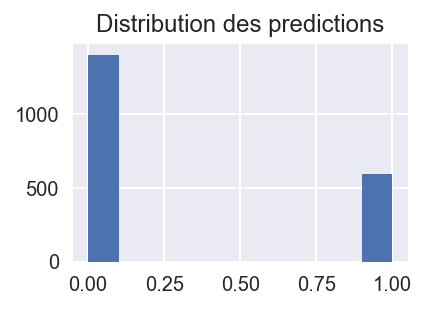

1.06345341662 0.880061308677
% de 0 : 0.6955
% de 1 : 0.3045


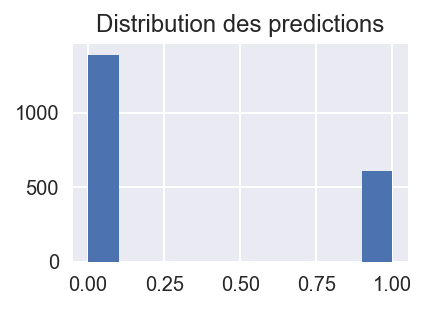

1.07797937989 0.85260455192
% de 0 : 0.705
% de 1 : 0.295


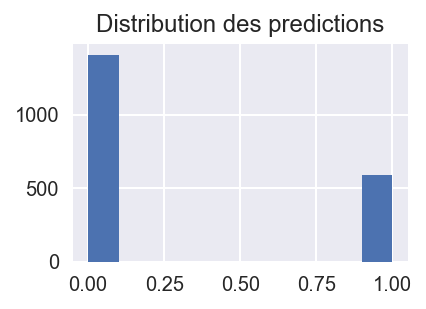

1.07492128236 0.858384921764
% de 0 : 0.703
% de 1 : 0.297


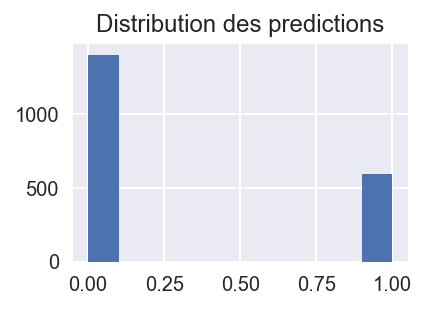

In [249]:
def get_test_target_distribution_with_iteration_on_class_weight(class_pred):
    for i in range(4):
        rf = RandomForestClassifier(
            n_estimators=200,
            random_state=42,
            n_jobs=8,
            class_weight={0: (class_pred == 0).mean() / (y == 0).mean(), 1: (class_pred).mean() / (y == 1).mean()}
        )
        rf.fit(df_train, target_train)
        class_pred = rf.predict(df_test)
        print (class_pred == 0).mean() / (y == 0).mean(), (class_pred == 1).mean() / (y == 1).mean()
        print '% de 0 :', (class_pred == 0).mean()
        print '% de 1 :', (class_pred).mean()
        plt.figure(figsize=(3, 2));plt.title('Distribution des predictions')
        pd.Series(class_pred).hist();plt.show()

        class_pred = rf.predict(df_test)


rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=8
)
rf.fit(df_train, target_train)
class_pred = rf.predict(df_test)
print '% de 0 :', (class_pred == 0).mean()
print '% de 1 :', (class_pred).mean()
plt.figure(figsize=(3, 2));plt.title('Distribution des predictions')
pd.Series(class_pred).hist();plt.show();

get_test_target_distribution_with_iteration_on_class_weight(class_pred)

###  Oversampling de la classe 1

In [297]:
df_train_balanced = df_train.copy()
df_train_balanced['target_train'] = target_train
nb_1_to_add = df_train[target_train==1].shape[0]
df_1_to_add = df_train_balanced[target_train==1].sample(nb_1_to_add)
df_train_balanced = pd.concat([df_train_balanced, df_1_to_add])
target_train_balanced = df_train_balanced.target_train
print df_train_balanced.target_train.mean()
df_train_balanced.drop('target_train', axis=1, inplace=True)

0.514114377651


In [300]:
X_train, X_test, y_train, y_test = train_test_split(
    df_train_balanced, target_train_balanced, test_size=0.2, random_state=42)
rf = RandomForestClassifier(
    n_estimators=200, random_state=42, n_jobs=8)
rf.fit(X_train, y_train)
print 'auc score : {}'.format(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

auc score : 0.956388197182


### Multi-model + blend

In [174]:
classifiers = [
    RandomForestClassifier(n_estimators=200, n_jobs=8),
    AdaBoostClassifier(n_estimators=100, learning_rate=0.7),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis(),
    xgb.XGBClassifier(max_depth=1, n_estimators=88, learning_rate=0.08, nthread=8),
    lgb.LGBMClassifier(n_estimators=38, num_leaves=4)
    ]

X_train, X_test, y_train, y_test = train_test_split(df_train, target_train, test_size=0.2, random_state=42)
df_blend = pd.DataFrame()
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print('****Results****')
    train_predictions = clf.predict_proba(X_test)[:,1]
    df_blend[name] = train_predictions
    acc = roc_auc_score(y_test, train_predictions)
    print "roc auc:", acc

RandomForestClassifier
****Results****
roc auc: 0.855523310191
AdaBoostClassifier
****Results****
roc auc: 0.860394319828
GradientBoostingClassifier
****Results****
roc auc: 0.874178411283
LinearDiscriminantAnalysis
****Results****
roc auc: 0.876209869219
XGBClassifier
****Results****
roc auc: 0.876337069164
LGBMClassifier
****Results****
roc auc: 0.875708551791


In [175]:
print 'Mean blend : ', roc_auc_score(y_test, df_blend.mean(axis=1))

Mean blend :  0.877652893799


### XGBoost

In [301]:
xgb_params = {
    'n_trees': 500, 
    'eta': 0.005,
    'max_depth': 4,
    'subsample': 0.95,
    'objective': 'binary:logitraw',
    'scale_pos_weight': float((train['Target'] == 0).sum()) / (train['Target'] == 1).sum(),
    'eval_metric': 'auc',
    'base_score': np.mean(target_train), # base prediction
    'silent': 1
}

# form DMatrices for Xgboost training
dtrain = xgb.DMatrix(df_train_balanced, target_train_balanced)
dtest = xgb.DMatrix(df_test)

# xgboost, cross-validation
cv_result = xgb.cv(xgb_params, 
                   dtrain, 
                   num_boost_round=2000,
                   early_stopping_rounds=50,
                   verbose_eval=50,
                   show_stdv=False
                  )
num_boost_rounds = len(cv_result)
print('\ntree number : {}'.format(num_boost_rounds))

# train model
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)

# score
print('auc score : {}'.format(roc_auc_score(dtrain.get_label(), model.predict(dtrain))))

[0]	train-auc:0.875853	test-auc:0.871276
[50]	train-auc:0.886495	test-auc:0.878944
[100]	train-auc:0.888145	test-auc:0.879252
[150]	train-auc:0.888931	test-auc:0.879637
[200]	train-auc:0.88973	test-auc:0.879916
[250]	train-auc:0.890697	test-auc:0.880236
[300]	train-auc:0.891712	test-auc:0.880562
[350]	train-auc:0.892366	test-auc:0.880708
[400]	train-auc:0.893075	test-auc:0.880607

tree number : 352
auc score : 0.889293112942


In [187]:
model.get_score()

{'10_diffExports(kmt)': 28,
 '10_diffImports(kmt)': 3,
 '10_diffRefinery intake(kmt)': 9,
 '10_diffSumExports(kmt)': 2,
 '10_diffSumImports(kmt)': 11,
 '10_diffSumProduction(kmt)': 3,
 '10_diffSumRefinery intake(kmt)': 1,
 '10_diffWTI': 13,
 '11_diffClosing stocks(kmt)': 24,
 '11_diffExports(kmt)': 36,
 '11_diffImports(kmt)': 13,
 '11_diffRefinery intake(kmt)': 52,
 '11_diffSumClosing stocks(kmt)': 23,
 '11_diffSumExports(kmt)': 1,
 '11_diffSumProduction(kmt)': 218,
 '11_diffWTI': 22,
 '12_diffClosing stocks(kmt)': 52,
 '12_diffExports(kmt)': 62,
 '12_diffImports(kmt)': 3,
 '12_diffRefinery intake(kmt)': 76,
 '12_diffSumClosing stocks(kmt)': 84,
 '12_diffSumExports(kmt)': 7,
 '12_diffSumImports(kmt)': 2,
 '12_diffSumProduction(kmt)': 1,
 '12_diffWTI': 21,
 '1_diffClosing stocks(kmt)': 15,
 '1_diffExports(kmt)': 27,
 '1_diffImports(kmt)': 30,
 '1_diffRefinery intake(kmt)': 7,
 '1_diffSumClosing stocks(kmt)': 7,
 '1_diffSumImports(kmt)': 4,
 '1_diffSumProduction(kmt)': 2,
 '2_diffClosing

### Cross validation

In [46]:
err = 0
NBROUND = 5
for train_index, test_index in StratifiedKFold(n_splits=NBROUND, shuffle=True, random_state=0).split(df_train, target_train):
    y = target_train
    X = df_train
    X_train, X_test = X.ix[train_index, :], X.ix[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    df_blend = pd.DataFrame()
    for clf in classifiers:
        clf.fit(X_train, y_train)
        name = clf.__class__.__name__
        train_predictions = clf.predict_proba(X_test)[:,1]
        df_blend[name] = train_predictions
        acc = roc_auc_score(y_test, train_predictions)

    # Faire un random pour avoir les meilleurs coef
    best = 0
    best_coef = []
    for i in range(1000):
        coef_ = np.random.dirichlet(np.ones(5),size=1)[0]
        blend = df_blend.RandomForestClassifier*coef_[0]+df_blend.AdaBoostClassifier*coef_[1]+df_blend.GradientBoostingClassifier*coef_[2]+df_blend.LinearDiscriminantAnalysis*coef_[3]+df_blend.XGBClassifier*coef_[4]
        new = roc_auc_score(y_test, blend)
        if best<new:
            best = new
            best_coef = coef_
    coef_ = best_coef
    print coef_
    blend = df_blend.RandomForestClassifier*coef_[0]+df_blend.AdaBoostClassifier*coef_[1]+df_blend.GradientBoostingClassifier*coef_[2]+df_blend.LinearDiscriminantAnalysis*coef_[3]+df_blend.XGBClassifier*coef_[4]
    err += roc_auc_score(y_test, blend)
    print("="*40)
    print 'SCORE FOLD',NBROUND,':', roc_auc_score(y_test, blend)
    print("="*40)

[ 0.0009066   0.05069894  0.15663312  0.02623178  0.76552957]
SCORE FOLD 5 : 0.878944050383
[  2.40829572e-02   6.98561358e-02   1.71074439e-01   8.96994103e-05
   7.34896768e-01]
SCORE FOLD 5 : 0.884416672821
[ 0.13486136  0.20633706  0.00434638  0.14329363  0.51116156]
SCORE FOLD 5 : 0.881845728347
[ 0.1061856   0.0523795   0.00700006  0.14575512  0.68867972]
SCORE FOLD 5 : 0.870280759552
[ 0.02505826  0.17539715  0.15136895  0.04361938  0.60455626]
SCORE FOLD 5 : 0.878215564963


In [47]:
print("*"*10)
print "Final mean score : ", err / NBROUND
print("*"*10) #0.87827669011

**********
Final mean score :  0.878740555213
**********


### Etude des résidus

ValueError: max must be larger than min in range parameter.

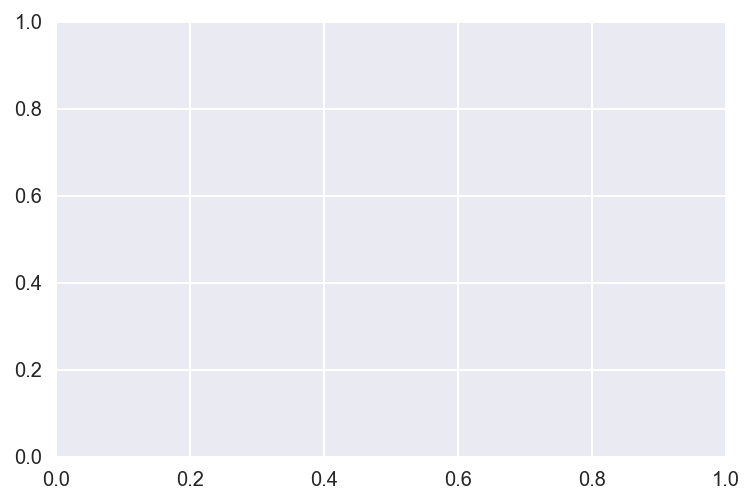

In [188]:
compare = pd.DataFrame([blend,y_test.reset_index(drop=True)]).T
compare.columns = ['pred','real']
compare['diff'] = (compare.real-compare.pred)
plt.hist(compare['diff'], bins=50);

In [189]:
abs_diff = compare['diff'].apply(lambda x: abs(x))
compare['abs_diff'] = abs_diff
compare.sort_values('abs_diff', ascending=False)

,pred,real,diff,abs_diff
1449,0.078142,1.0,0.921858,0.921858
48,0.078188,1.0,0.921812,0.921812
1944,0.078376,1.0,0.921624,0.921624
1629,0.078411,1.0,0.921589,0.921589
1889,0.078462,1.0,0.921538,0.921538
1783,0.078572,1.0,0.921428,0.921428
915,0.078621,1.0,0.921379,0.921379
451,0.078698,1.0,0.921302,0.921302
700,0.078765,1.0,0.921235,0.921235
45,0.078773,1.0,0.921227,0.921227


# Calcul des predictions et soumission

In [46]:
df_blend = pd.DataFrame()
for clf in classifiers:
    clf.fit(df_train, target_train)
    name = clf.__class__.__name__
    df_blend[name] = clf.predict_proba(df_test)[:,1]
    print name
    
prediction = df_blend.RandomForestClassifier*coef_[0]+df_blend.AdaBoostClassifier*coef_[1]+df_blend.GradientBoostingClassifier*coef_[2]+df_blend.LinearDiscriminantAnalysis*coef_[3]+df_blend.XGBClassifier*coef_[4]

RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
LinearDiscriminantAnalysis
XGBClassifier
LGBMClassifier


In [302]:
prediction = model.predict(dtest)

In [303]:
soumission = pd.DataFrame(test.ID)
soumission['Target'] = prediction
soumission.to_csv('soumission.csv', index=False, sep = ';')

**TODO:**
- tester techniques dataset déséquilibrés
- étudier les résidus
- FeatureMixer
- stacking
- probleme multi-threading
- faire une passe sur différents scripts pour voir ce qu'il y a à prendre ailleurs
- supprimer des features avec faible FI
+ un modele par mois
+ stacking

*pour le blending => faire des groupes de features pour chaque modèle : *
"The idea was to select some groups of features, especially without our golden features. That would force each model to grab the maximum signal with less important features. 
For example, if you let all your magic features, XGB will see it really quickly and will not explore orthogonal signal."
*puis faire une regression au lieu de monte carlo les coefs*

https://challengedata.ens.fr/fr/challenge/25/predire_la_tendance_de_la_production_de_petrole_brut.html
0.83056905197767